In [33]:
import numpy as np
import pandas as pd
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [10]:
data = pd.DataFrame()

count = 0
found = []

def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        data = pd.DataFrame()
        count = 0
        for i, row in chunk.iterrows():
            if 'limate change' in row.quotation or 'lobal warming' in row.quotation:
                if 'None' not in row.speaker:            
                    data = data.append(row, ignore_index=True)
                    count += 1

        del data["probas"]
        del data["phase"]
        del data["qids"]
        del data["urls"]
        
        return data
    

with pd.read_json('quotes-2020.json.bz2', lines=True, compression='bz2', chunksize=1000000) as df_reader:
    for chunk in df_reader:
        
        
        data = data.append(process_chunk(chunk))
        


Processing chunk with 1000000 rows
Processing chunk with 1000000 rows
Processing chunk with 1000000 rows
Processing chunk with 1000000 rows
Processing chunk with 1000000 rows
Processing chunk with 244449 rows


In [47]:
print(len(data))
data.head()

6428


,date,numOccurrences,quotation,quoteID,speaker
0,2020-01-29 09:04:36,5.0,Many make the link today between their experie...,2020-01-29-062975,Peter Maurer
1,2020-02-10 05:51:51,1.0,the National Energy and Climate Plans are how ...,2020-02-10-076321,Kadri Simson
2,2020-01-06 11:49:00,1.0,"This budget also allows us to earmark £ 500,00...",2020-01-06-069057,John Whitehead
3,2020-03-10 20:47:28,2.0,"As a state, we will pursue every option availa...",2020-03-10-005294,Kate Brown
4,2020-01-04 04:07:00,1.0,tracks directly back to the issues of climate ...,2020-01-04-039724,David Caldicott


In [48]:
print(data.size)
data.tail()

32140


,date,numOccurrences,quotation,quoteID,speaker
273,2020-01-09 00:00:00,2.0,The courts are increasingly saying that you ha...,2020-01-09-077992,Rob Bishop
274,2020-02-06 22:38:10,1.0,The expected increase in severe weather due to...,2020-02-06-089077,Deb Gardner
275,2020-02-05 16:30:31,2.0,We will be an energetic champion of free trade...,2020-02-05-114487,Dominic Raab
276,2020-02-10 11:00:08,1.0,"Obama got health care, Trump got his tax cut, ...",2020-02-10-057505,Tom Steyer
277,2020-02-23 22:38:42,2.0,We've been writing about climate change being ...,2020-02-23-041538,Lesley Hughes


I do not undestand why the length is 6428 but then we only have 277 lines in the dataframe.

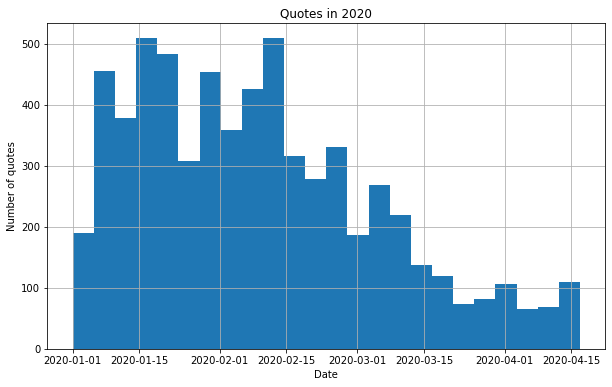

2020-01-01 00:00:00
2020-04-16 20:46:52


In [42]:
data['date'].hist(bins=24, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of quotes')
plt.title('Quotes in 2020')
plt.show()

print(min(data['date']))
print(max(data['date']))

In [38]:
data.speaker.mode()

0    Bernie Sanders
dtype: object

In [40]:
n = 10
data['speaker'].value_counts()[:n].index.tolist()

['Bernie Sanders',
 'Scott Morrison',
 'Joaquin Phoenix',
 'Larry Fink',
 'Joe Biden',
 'Boris Johnson',
 'Greta Thunberg',
 'Malcolm Turnbull',
 'Antonio Guterres',
 'Jeff Bezos']